In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# city_data_to_load = "data/city_data.csv"
# ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")

ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = ride_data.merge(city_data,how="left",on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

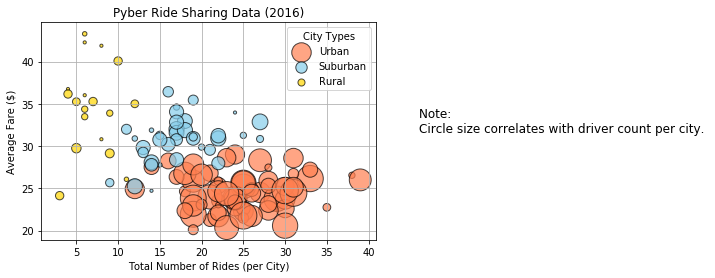

In [106]:
grouped_data = combined_data.groupby("city").agg({"fare":'mean',"ride_id":'count'})
grouped_data = grouped_data.rename({"fare":"Average Fare ($)","ride_id":"Total Number of Rides (per City)"},axis=1)
grouped_data = grouped_data.merge(city_data,how='left',on="city")

city_types = ["Urban", "Suburban", "Rural"]

urban = grouped_data.loc[grouped_data["type"] == "Urban",:]
suburban = grouped_data.loc[grouped_data["type"] == "Suburban",:]
rural = grouped_data.loc[grouped_data["type"] == "Rural",:]

urban_x = urban["Total Number of Rides (per City)"]
urban_y = urban["Average Fare ($)"]
urban_size = urban["driver_count"]
plt.scatter(urban_x,urban_y,s=urban_size*10,c="coral",alpha=.7,edgecolor = "black")


suburban_x = suburban["Total Number of Rides (per City)"]
suburban_y = suburban["Average Fare ($)"]
suburban_size = suburban["driver_count"]
plt.scatter(suburban_x,suburban_y,s=suburban_size*10,c="SkyBlue",alpha=.7,edgecolor = "black")


rural_x = rural["Total Number of Rides (per City)"]
rural_y = rural["Average Fare ($)"]
rural_size = rural["driver_count"]
plt.scatter(rural_x,rural_y,s=rural_size*10,c="Gold",alpha=.7,edgecolor = "black")


plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")

plt.grid()
plt.legend(city_types,title="City Types",loc = "best")

plt.figtext(1,.5,"Note: \n Circle size correlates with driver count per city.", wrap=True,
            horizontalalignment='left', fontsize=12)


plt.savefig("../Images/pyber_bubble_plot.png")
plt.show()

## Total Fares by City Type

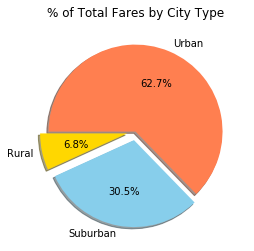

In [123]:
fares_type = combined_data.groupby("type").agg({"fare":"sum"})

labels=["Rural","Suburban","Urban"]
sizes = fares_type["fare"]
colors=["Gold","SkyBlue","Coral"]
explode = (.1,.1,0)

plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=180)

plt.title("% of Total Fares by City Type")

plt.savefig("../Images/fares_by_type.png")

plt.show()


## Total Rides by City Type

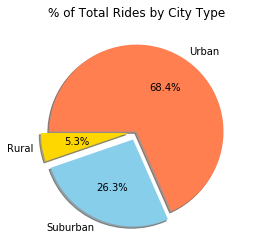

In [122]:

rides_type = combined_data.groupby("type").agg({"ride_id":"count"})

labels=["Rural","Suburban","Urban"]
sizes = rides_type["ride_id"]
colors=["Gold","SkyBlue","Coral"]
explode = (.1,.1,0)

plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=180)

plt.title("% of Total Rides by City Type")

plt.savefig("../Images/rides_by_type.png")

plt.show()


## Total Drivers by City Type

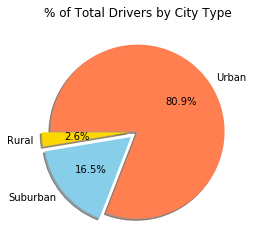

In [136]:
drivers_type = grouped_data.groupby("type").agg({"driver_count":"sum"})

labels=["Rural","Suburban","Urban"]
sizes = drivers_type["driver_count"]
colors=["Gold","SkyBlue","Coral"]
explode = (.1,.1,0)

plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=180)

plt.title("% of Total Drivers by City Type")

plt.savefig("../Images/drivers_by_type.png")

plt.show()


#  Katie's Analysis

* The fact that the percentage of drivers by city type is smaller than the percentage of fares by city type leades me to believe that the rural drivers are earning more per ride than suburban or urban drivers, which would be a logical conclusion given that a rural community is likely more spreadout and so the trips would be longer.
* There are more ride in urban cities that have a lower average fare, and fewer rides in rural cities with a higher average fare.
* The data does not take into account rides that may go between different city types (going from suburban into an urban city). I would be interested in seeing the visualization of rides between city types by time of day.